In [16]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from matplotlib.pyplot import xlabel
import networkx as nx
from GMLA_2 import *
from PTVA_algo_final2 import *
from TSSI_complete import *
import seaborn as sns

In [17]:
G_football, _ = load("football")
G_facebook, _ = load("facebook")

In [18]:
d_url = "http://www-personal.umich.edu/~mejn/netdata/dolphins.zip"
with urlopen(d_url) as sock, ZipFile(BytesIO(sock.read())) as zf:
    gml = zf.read("dolphins.gml").decode().split("\n")[1:]
    G_dolphin = nx.parse_gml(gml)

In [19]:
adj_noun = nx.read_gml("adjnoun.gml")

In [20]:
 # Counter -> dict {item: freq}
from collections import Counter, defaultdict

# Dataframe for Algorithms using Partial Infection - GFHF, LGC

In [21]:
def gen_data_partial(algo, dataset, n_snaps=10):
    df_dist_err = defaultdict(list)
    df_time = defaultdict(list)
    err_freq = []
    df_candidates = []
    
    for G_name, G in dataset.items():
        src = rand.choice(list(G.nodes()))
        N = G.number_of_nodes()
        known_dicts = simulatePartialInfection(
            G, src, threshold=0.3, sampling=0.2, n_snaps=n_snaps
        )
        score_time = [
            [alg(G, label, src) for label in known_dicts] for alg in algo.values()
        ]
        """
        alg_data = [alg1 [], alg2 [] ...]
        alg1 [] -> [(dist_err), (snapshot_time), (no_of_suspected_candidates)]
        snapshot_score_dict = {node: score}
        """
        alg_data = [list(zip(*res)) for res in score_time]
        
        dict_freq = defaultdict(list)
        dict_cand = defaultdict(list)
        
        freq_hops = [Counter(err) for err, _, _ in alg_data]
        avg_dist_err = [stats.mean(err) for err, _, _ in alg_data]
        avg_time = [stats.mean(time) for _, time, _ in alg_data]
        sus_cand = [candidates for _, _, candidates in alg_data]
        
        for alg_name, de, time, freq, cand in zip(
            algo.keys(), avg_dist_err, avg_time, freq_hops, sus_cand
            ):
            df_dist_err[alg_name].append(de)
            df_time[alg_name].append(time)
            dict_freq[alg_name] = [freq[i] if i in freq else 0 for i in range(4)]
            dict_cand[alg_name] = cand
        
        df = pd.DataFrame(dict_freq, columns=algo.keys(), index=list(range(4)))
        err_freq.append(df)
        
        df = pd.DataFrame(dict_cand, columns=algo.keys())
        df_candidates.append(df)    
    
    df_de = pd.DataFrame(df_dist_err, columns=algo.keys(), index=dataset.keys())
    df_time = pd.DataFrame(df_time, columns=algo.keys(), index=dataset.keys())
                        
    return df_de, df_time, err_freq, df_candidates
    

# Dataframe For Algorithms using Complete Observation - GMLA, PTVA

In [22]:
def gen_data_complete(algo, dataset, iterations):
    df_dist_err = defaultdict(list)
    df_time = defaultdict(list)
    df_candidates = []
    err_freq = []
    
    for G_name, G in dataset.items():
        N = G.number_of_nodes()
        score_time_cand = [alg(G, G_name, iterations) for alg in algo.values()]
        alg_data = [list(zip(*res)) for res in score_time_cand]
        dict_freq = defaultdict(list)
        dict_cand = defaultdict(list)
        
        freq_hops = [Counter(err) for err, _, _ in alg_data]
        avg_dist_err = [stats.mean(err) for err, _, _ in alg_data]
        avg_time = [stats.mean(time) for _, time, _ in alg_data]
        sus_cand = [candidates for _, _, candidates in alg_data]
        
        for alg_name, de, time, freq, cand in zip(
            algo.keys(), avg_dist_err, avg_time, freq_hops, sus_cand
        ):
            df_dist_err[alg_name].append(de)
            df_time[alg_name].append(time)
            dict_freq[alg_name] = [freq[i] if i in freq else 0 for i in range(4)]
            dict_cand[alg_name] = cand
            
        df = pd.DataFrame(dict_freq, columns=algo.keys(), index=list(range(4)))
        err_freq.append(df)
        
        df = pd.DataFrame(dict_cand, columns=algo.keys())
        df_candidates.append(df)
        
        
    df_de = pd.DataFrame(df_dist_err, columns=algo.keys(), index=dataset.keys())
    df_time = pd.DataFrame(df_time, columns=algo.keys(), index=dataset.keys())
    
    return df_de, df_time, err_freq, df_candidates
    

# Datasets and algorithms

In [23]:
comp_algo = {
    "GMLA": GMLA, 
    "PTVA": PTVA_algo
    }
par_algo = {
    "GFHF": TSSI_GFHF, 
    "LGC": TSSI_LGC
    }

In [24]:
dataset = {
        "Karate": nx.karate_club_graph(),
        "Football": G_football,
        # "Facebook": G_facebook,
        "Dolphin": G_dolphin,
        "albert barabasi": nx.barabasi_albert_graph(n=100, m=5),
        "erdos renyi": nx.erdos_renyi_graph(n=100, p=0.2),
        "Adjective Noun": adj_noun
}

In [10]:
de_comp, time_comp, freq_comp, cand_comp = gen_data_complete(comp_algo, dataset, 30)
de_par, time_par, err_freq_par, cand_par = gen_data_partial(par_algo, dataset, 30)

GMLA 29 -> 4
GMLA 30 -> 4
GMLA 32 -> 12
GMLA 14 -> 2
GMLA 32 -> 12
GMLA 2 -> 10
GMLA 28 -> 3
GMLA 33 -> 17
GMLA 33 -> 17
GMLA 6 -> 4
GMLA 1 -> 9
GMLA 24 -> 3
GMLA 5 -> 4
GMLA 7 -> 4
GMLA 33 -> 17
GMLA 10 -> 3
GMLA 33 -> 17
GMLA 12 -> 2
GMLA 32 -> 12
GMLA 21 -> 2
GMLA 28 -> 3
GMLA 14 -> 2
GMLA 0 -> 16
GMLA 25 -> 3
GMLA 9 -> 2
GMLA 28 -> 3
GMLA 3 -> 6
GMLA 19 -> 3
GMLA 29 -> 4
GMLA 30 -> 4


/home/mritunjay/6th Sem NITS/Social Networking and Analysis(CS-331)/SNA Group Project/Codes/soumen_clone/src_infection_labelling/PTVA_algo_final2.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(m, i)[0]


PTVA 8 -> 5
PTVA 9 -> 2
PTVA 6 -> 4
PTVA 26 -> 2
PTVA 13 -> 5
PTVA 8 -> 5
PTVA 9 -> 2
PTVA 2 -> 10
PTVA 8 -> 5
PTVA 9 -> 2
PTVA 1 -> 9
PTVA 29 -> 4
PTVA 2 -> 10
PTVA 32 -> 12
PTVA 0 -> 16
PTVA 9 -> 2
PTVA 8 -> 5
PTVA 2 -> 10
PTVA 32 -> 12
PTVA 13 -> 5
PTVA 0 -> 16
PTVA 9 -> 2
PTVA 27 -> 4
PTVA 23 -> 5
PTVA 8 -> 5
PTVA 8 -> 5
PTVA 30 -> 4
PTVA 27 -> 4
PTVA 19 -> 3
PTVA 0 -> 16
GMLA 32 -> 11
GMLA 54 -> 12
GMLA 77 -> 11
GMLA 42 -> 10
GMLA 89 -> 12
GMLA 30 -> 11
GMLA 112 -> 11
GMLA 16 -> 12
GMLA 25 -> 10
GMLA 103 -> 10
GMLA 38 -> 11
GMLA 62 -> 11
GMLA 77 -> 11
GMLA 19 -> 11
GMLA 7 -> 12
GMLA 74 -> 11
GMLA 45 -> 11
GMLA 18 -> 11
GMLA 106 -> 10
GMLA 4 -> 12
GMLA 66 -> 11
GMLA 68 -> 12
GMLA 30 -> 11
GMLA 88 -> 11
GMLA 43 -> 7
GMLA 67 -> 11
GMLA 74 -> 11
GMLA 57 -> 10
GMLA 57 -> 10
GMLA 96 -> 10
PTVA 38 -> 11
PTVA 23 -> 11
PTVA 56 -> 11
PTVA 82 -> 11
PTVA 29 -> 9
PTVA 28 -> 11
PTVA 10 -> 11
PTVA 27 -> 10
PTVA 27 -> 10
PTVA 110 -> 11
PTVA 47 -> 11
PTVA 34 -> 10
PTVA 105 -> 12
PTVA 36 -> 11
PTVA

# Plotting

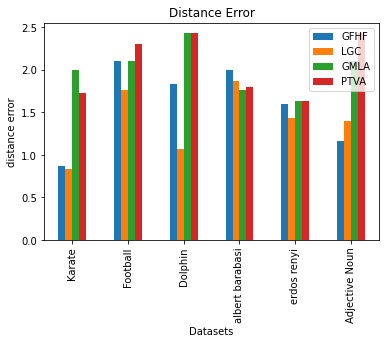

In [11]:
# Distance Error vs Dataset
de = pd.concat([de_par, de_comp], axis=1)
de.plot.bar(title="Distance Error", xlabel="Datasets", ylabel="distance error")
plt.show()

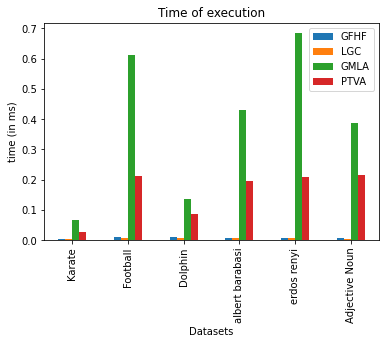

In [12]:
# Execution Time Vs Dataset
time = pd.concat([time_par, time_comp], axis=1)
time.plot.bar(title="Time of execution", xlabel="Datasets", ylabel="time (in ms)")
plt.show()

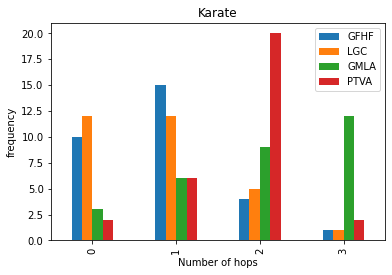

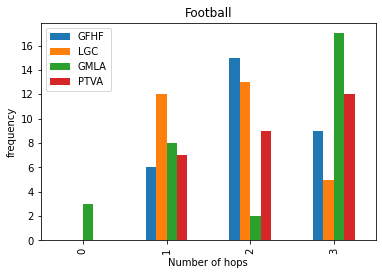

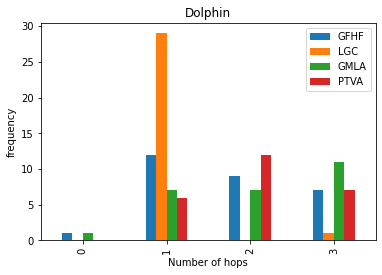

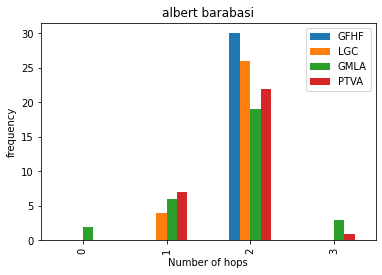

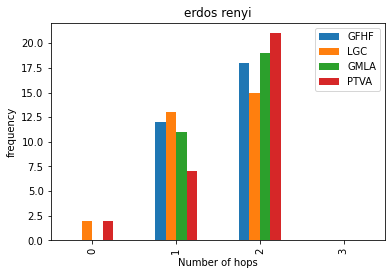

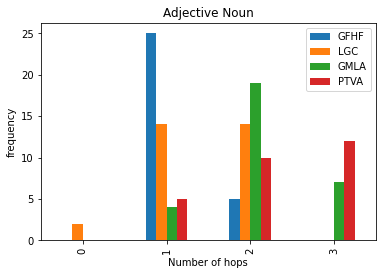

In [13]:
# Frequeny vs Distance Error
freq = [pd.concat([p, c], axis=1) for p, c in zip(err_freq_par, freq_comp)]
for f, title in zip(freq, dataset.keys()):
    f.plot.bar(title=title, xlabel="Number of hops", ylabel="frequency")
plt.show()

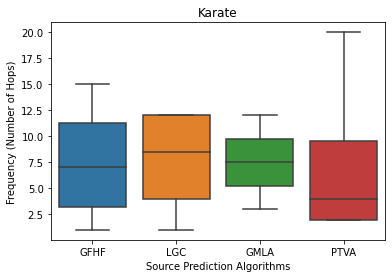

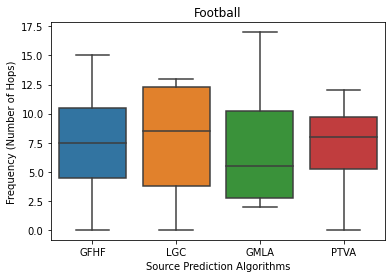

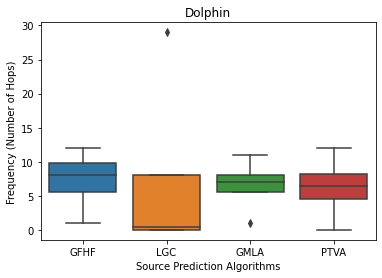

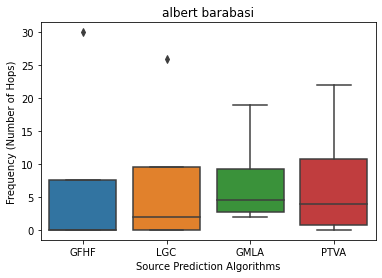

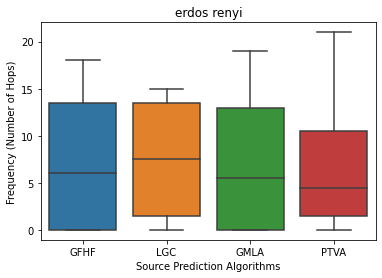

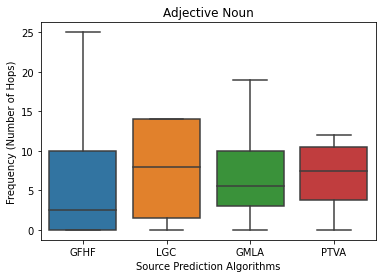

In [14]:
# Frequeny vs Distance Error
freq = [pd.concat([p, c], axis=1) for p, c in zip(err_freq_par, freq_comp)]
for f, title in zip(freq, dataset.keys()):
    fig = sns.boxplot(data=f)
    fig.set(title = title, xlabel = "Source Prediction Algorithms", ylabel = 'Frequency (Number of Hops)')
    plt.show()

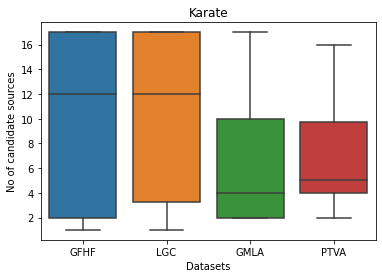

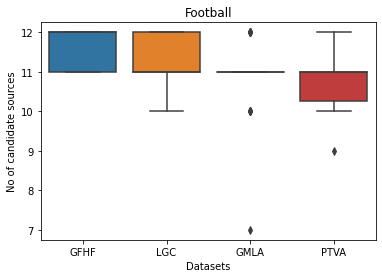

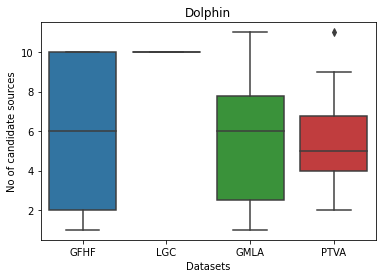

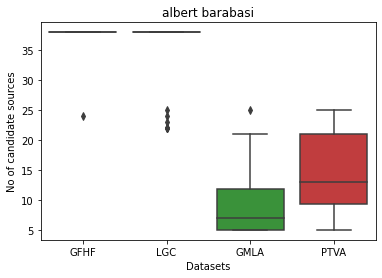

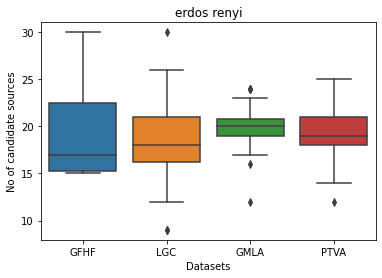

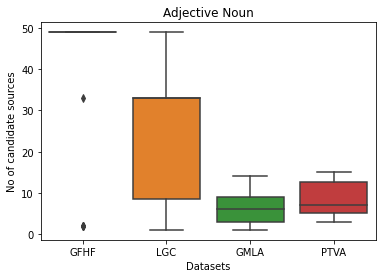

In [15]:
# Whisker Plot for Number of candidate sources
cand = [pd.concat([p, c], axis=1) for p, c in zip(cand_par, cand_comp)]
for name, c in zip(dataset.keys(), cand):
    fig = sns.boxplot(data=c)
    fig.set(title=name, xlabel = 'Datasets', ylabel = 'No of candidate sources')
    plt.show()